In [1]:
import numpy as np
import pandas as pd
import csv

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from matplotlib.pyplot import plot

In [2]:
data = pd.read_csv("abalone.csv") 

In [3]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [5]:
train_X = data[['Sex','Length','Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]

In [6]:
train_y = data[['Rings']]

In [7]:
kFold = KFold(n_splits=5, random_state=1, shuffle=True)
acc = 0.52
index = 0
x = []
y = []
for i in range(1, 51):
    forest = RandomForestRegressor(n_estimators = i, random_state=1)
    crosval_score = cross_val_score(X = train_X, y = train_y, cv = kFold, estimator = forest,scoring = 'r2')
    crosval_accur = np.mean(crosval_score)
    x.append(i)
    y.append(crosval_accur)
    if crosval_accur > acc and index == 0:
        index = i

In [13]:
index+1

22

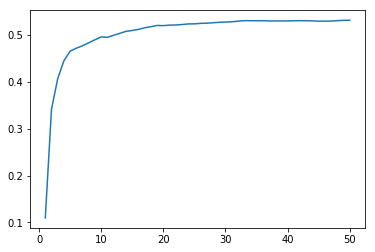

In [10]:
plot(x,y)

In [16]:
open('answer1.txt', 'tw', encoding='utf-8').write(str(index+1))

2